In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

# EDA

In [3]:
data = pd.read_csv('data/Students_Grading_Dataset_Biased.csv')
data.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,None,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [5]:
# Dropping unnecessary columns
data = data.drop(['First_Name','Last_Name','Email'], axis=1)
data.head()

,Student_ID,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,None,Medium,4,9.0
2,S1002,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [6]:
print('Column count:', data.shape[1])
print('Row count:   ', data.shape[0])

Column count: 20
Row count:    5000


AttributeError: QuadMesh.set() got an unexpected keyword argument 'axis'

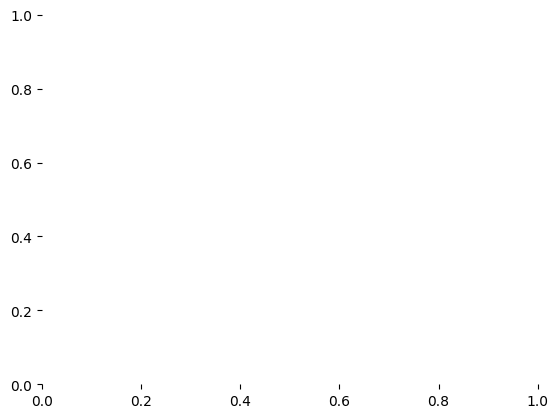

In [11]:
sns.heatmap(data.isnull(), axis = 1)